In [6]:
import pandas as pd

# Columns must match exactly (spelling, capitalization, spacing)
columns_to_keep = [
    "Year",
    "Age category",
    "Venue accessibility",
    "Venue address",
    "Latitude",
    "Longitude",
    "Performances #",
    "Lowest full price",
    "Lowest concession price"
]

all_frames = []

for year in range(2014, 2025):
    if year == 2020:  
        # Skip the missing file
        continue
    
    file_name = f"FData{year}.xlsx"
    try:
        # Skip the first two rows so pandas sees the real header on row 3
        df = pd.read_excel(file_name, skiprows=2)
        # Now select the exact columns you need
        df = df[columns_to_keep]
        all_frames.append(df)
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

combined_df = pd.concat(all_frames, ignore_index=True)
combined_df.to_excel("FringeDataCombined.xlsx", index=False)
print("Data merged successfully!")


Data merged successfully!


In [8]:
import pandas as pd
import numpy as np

#add a new text column and an optional numeric code.

def classify_accessibility(text):
    if pd.isna(text) or not text.strip():
        return "None"
    
    txt_lower = text.lower()

    if "full venue site is accessible" in txt_lower:
        return "Full"
    
    if "no wheelchair accessible toilet" in txt_lower:
        return "Partial"
    
    if "limited access" in txt_lower or "not reachable" in txt_lower:
        return "Partial"

    if "wheelchair accessible toilet" in txt_lower or "lift level access" in txt_lower:
        return "Full"

    if "accessible" in txt_lower:
        return "Partial"

    return "Partial"

combined_df["Accessibility level"] = combined_df["Venue accessibility"].apply(classify_accessibility)

# Map text labels to numeric codes :
code_map = {"Full": 1, "Partial": 2, "None": 3}
combined_df["Accessibility code"] = combined_df["Accessibility level"].map(code_map)

# Save changes directly to the same file:
combined_df.to_excel("FringeDataCombined.xlsx", index=False)
# if it's CSV: combined_df.to_csv("FringeDataCombined.csv", index=False)


In [3]:
import pandas as pd

df1=pd.read_excel("FringeDataCombined.xlsx") 

In [5]:
print(df1.head())
print(df1.tail())


   Year Age category                                Venue accessibility  \
0  2014          16+  Limited access to some parts of venue site, So...   
1  2014          18+  Full venue site is accessible, Lift level acce...   
2  2014          16+  Accessible WC, wheelchair accessible, hearing ...   
3  2014            U  Full venue site is accessible, Lift level acce...   
4  2014          16+  Venue underwent a full multi-million pound ref...   

                             Venue address   Latitude  Longitude  \
0      7 Merchant St (Off Candlemaker Row)  55.947622  -3.192055   
1                             65 Canongate  55.952166  -3.176854   
2  Corner of Potterrow and Marshall Street  55.945302  -3.186575   
3                         81 Holyrood Road  55.950666  -3.177713   
4                       25 Nicolson Square  55.945723  -3.185509   

   Performances #  Lowest full price  Lowest concession price  \
0              21                0.0                      0.0   
1         

In [14]:
na_count=df1["Venue accessibility"].isna().sum()
print('There are', na_count, 'missing values in the Venue accessibility column')
isna=round((na_count/34751) * 100,2)
print('This is', isna, '% of the total data')

There are 1966 missing values in the Venue accessibility column
This is 5.66 % of the total data


Top 10 venues by total performances across all years:
Venue address
60 pleasance               34780
george square              23187
1 summerhall               19113
teviot row house           17739
rowantree bar              12477
nicolson street            11481
teviot place               11264
139 cowgate                11164
66 cowgate                  8898
38 west nicolson street     8349
Name: Performances #, dtype: int64

The venue with the most performances overall is: 60 pleasance with 34780 performances

Venue with most performances each year:
      Year    Venue address  Performances #
182   2014     60 pleasance            3900
483   2015     60 pleasance            4002
788   2016     60 pleasance            3772
1071  2017     60 pleasance            3918
1383  2018     60 pleasance            4000
1701  2019     60 pleasance            4002
1849  2021  180 high street             584
2090  2022     60 pleasance            3612
2370  2023     60 pleasance            3648

C:\Users\arro1\AppData\Local\Temp\ipykernel_11696\1076563414.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


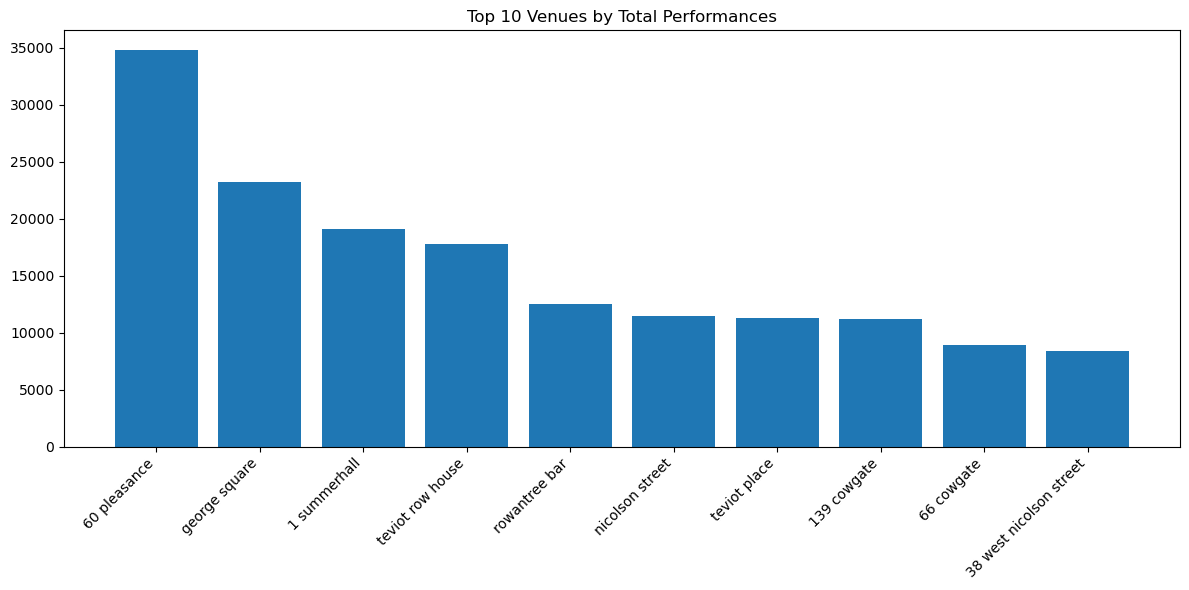

ValueError: Image size of 229023x578 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 1 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("FringeDataCombined.xlsx")

# Clean up venue addresses (remove whitespace, standardize case)
df['Venue address'] = df['Venue address'].str.strip().str.lower()

# 1. Find venue with most performances overall
venue_total_performances = df.groupby('Venue address')['Performances #'].sum().sort_values(ascending=False)
top_venue_overall = venue_total_performances.head(10)

print("Top 10 venues by total performances across all years:")
print(top_venue_overall)
print(f"\nThe venue with the most performances overall is: {top_venue_overall.index[0]} with {top_venue_overall.iloc[0]} performances")

# 2. Find venue with most performances per year
venue_year_performances = df.groupby(['Year', 'Venue address'])['Performances #'].sum().reset_index()
top_venues_by_year = venue_year_performances.sort_values(['Year', 'Performances #'], ascending=[True, False])
top_venue_each_year = top_venues_by_year.groupby('Year').head(1)

print("\nVenue with most performances each year:")
print(top_venue_each_year[['Year', 'Venue address', 'Performances #']])

# Optional: Create visualizations
plt.figure(figsize=(12, 6))
plt.bar(top_venue_overall.index[:10], top_venue_overall.values[:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Venues by Total Performances')
plt.tight_layout()
plt.savefig('top_venues_overall.png')

plt.figure(figsize=(12, 6))
plt.bar(top_venue_each_year['Year'].astype(str), top_venue_each_year['Performances #'])
plt.xticks(rotation=45)
for i, row in top_venue_each_year.iterrows():
    plt.text(i, row['Performances #'], row['Venue address'], 
             ha='center', va='bottom', rotation=90, fontsize=8)
plt.title('Top Venue Performance Count by Year')
plt.tight_layout()
plt.savefig('top_venues_by_year.png')

print("\nVisualizations saved as 'top_venues_overall.png' and 'top_venues_by_year.png'")

In [2]:
import pandas as pd

# Load the data
df = pd.read_excel("FringeDataCombined.xlsx")

# Clean venue addresses (standardize case and remove extra whitespace)
df['Venue address'] = df['Venue address'].str.strip()

# Filter for rows where venue is "60 Pleasance" and year is 2014
pleasance_2014 = df[(df['Venue address'].str.contains('60 Pleasance', case=False)) & (df['Year'] == 2014)]

# Display the results
print(f"Found {len(pleasance_2014)} entries for '60 Pleasance' in 2014:")
print(pleasance_2014)

# Check for potential duplicates
if len(pleasance_2014) > 1:
    print("\nPotential duplicates detected. Here's a summary of performances counts:")
    print(pleasance_2014['Performances #'].value_counts())
    
    print("\nChecking for exact duplicates:")
    duplicates = pleasance_2014.duplicated(keep=False)
    if duplicates.any():
        print("Exact duplicates found:")
        print(pleasance_2014[duplicates])
    else:
        print("No exact duplicates found. Rows differ in at least one column.")

# Save the filtered data to a CSV for easier inspection
pleasance_2014.to_csv("60_Pleasance_2014.csv", index=False)
print("\nFiltered data saved to '60_Pleasance_2014.csv'")

Found 179 entries for '60 Pleasance' in 2014:
      Year Age category                                Venue accessibility  \
14    2014           PG  A full accessibility guide can be found at www...   
16    2014          14+  A full accessibility guide can be found at www...   
35    2014          12+  A full accessibility guide can be found at www...   
40    2014           PG  A full accessibility guide can be found at www...   
96    2014          12+  A full accessibility guide can be found at www...   
...    ...          ...                                                ...   
3320  2014          12+  A full accessibility guide can be found at www...   
3333  2014          14+  A full accessibility guide can be found at www...   
3351  2014            U  A full accessibility guide can be found at www...   
3360  2014          14+  A full accessibility guide can be found at www...   
3368  2014            U  A full accessibility guide can be found at www...   

     Venue addres

In [3]:
import pandas as pd

# Load the data from FData2014.xlsx, skipping the first 2 rows
# This ensures the header row (row 3) is properly recognized as column names
df_2014 = pd.read_excel("FData2014.xlsx", skiprows=2)

# Display the column names to verify we have the correct structure
print("Columns in FData2014.xlsx:")
print(df_2014.columns.tolist())
print("\n")

# Filter for rows where venue is "60 Pleasance"
pleasance_entries = df_2014[df_2014['Venue address'].str.contains('60 Pleasance', case=False, na=False)]

# Display the results
print(f"Found {len(pleasance_entries)} entries for '60 Pleasance' in FData2014.xlsx:")
print(pleasance_entries)

# Check for potential duplicates
if len(pleasance_entries) > 1:
    print("\nPotential duplicates detected. Here's a summary of performances counts:")
    print(pleasance_entries['Performances #'].value_counts())
    
    print("\nChecking for exact duplicates:")
    duplicates = pleasance_entries.duplicated(keep=False)
    if duplicates.any():
        print("Exact duplicates found:")
        print(pleasance_entries[duplicates])
    else:
        print("No exact duplicates found. Rows differ in at least one column.")

# Save the filtered data to a CSV for easier inspection
pleasance_entries.to_csv("60_Pleasance_2014_original.csv", index=False)
print("\nFiltered data saved to '60_Pleasance_2014_original.csv'")

Columns in FData2014.xlsx:
['ID', 'Festival', 'Year', 'Website', 'Code', 'Title', 'Subtitle', 'Teaser', 'Description', 'Genre', 'Genre tags', 'Warnings', 'Artist', 'Artist type', 'Age category', 'Country', 'Performers #', 'Last updated', 'Venue', 'Venue code', 'Venue address', 'Venue postcode', 'Venue website', 'Venue description', 'Venue accessibility', 'Latitude', 'Longitude', 'Performances #', 'Lowest full price', 'Lowest concession price', 'First performance date', 'Last performance date']


Found 179 entries for '60 Pleasance' in FData2014.xlsx:
                                                     ID  \
14    https://api.edinburghfestivalcity.com/events/5...   
16    https://api.edinburghfestivalcity.com/events/5...   
35    https://api.edinburghfestivalcity.com/events/8...   
40    https://api.edinburghfestivalcity.com/events/b...   
96    https://api.edinburghfestivalcity.com/events/0...   
...                                                 ...   
3320  https://api.edinburghfes

2025-04-04 17:05:03.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 17:05:03.682 No runtime found, using MemoryCacheStorageManager
2025-04-04 17:05:03.685 No runtime found, using MemoryCacheStorageManager
2025-04-04 17:05:03.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 17:05:03.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 17:05:03.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 17:05:04.192 Thread 'Thread-22': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 17:05:04.219 Thread 'Thread-22': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 17:05:08.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored

TypeError: '<' not supported between instances of 'float' and 'str'

2025-04-04 16:56:28.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 16:56:28.689 No runtime found, using MemoryCacheStorageManager
2025-04-04 16:56:28.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 16:56:28.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 16:56:28.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 16:56:28.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 16:56:28.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 16:56:28.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-04 16:56:28.699 Thread 'MainThread':